# **Computer Vision Systems Homework**

Hi all!

In the spirit of #StayAtHome I tried to assemble a homework project without leaving the house. So, if this looks a little DIY, that's why. So without further ado:

## **Welcome to Cactusville!**

Cactusville is a small town populated by - you guessed correcty - cacti. Since it is a rapidly developing village, they are considering to use self-driving vehicles in their hometown. Your job as a computer vision maestro is to develop the required detection methods.

## The setting

Cactusville is quite unique in the sense that the entire surface of the town is covered in blue tablecloth. The exact colour and pattern of the cloth may vary slightly.

By-and large there are 3 different objects of interest:

* **Cacti:** These are the inhabitants of the village, so self-driving cars must be able to detect them to avoid hitting a cactus. Cacti have four basic sub-types: ***Happy***, ***Sad***, ***Angry*** and ***Evil***
* **Vehicles:** These are other vechiles you should also avoid colliding with. There are 3 vehicles in Cactusville: An ***SUV***, a ***truck***, and an ***airplane***.
* **Traffic Signs:** There are several signs placed all around the town, often multiple ones on a single stand. There are 55 different traffic sign classes, which are not listed here for the sake of brevity.

## Tasks

The people of Cactusville provided 4 videos for you to develop your algorithms with. Each video consists of several RGB and corresponding depth frames, which are found in the '*rgb*' and '*depth*' subfolders of the video. They are ordered numerically. The depth image is a single-channel, 16-bit image, where the pixel value is the distance of that pixel from the camera in **mm**.

The videos also contain a **calibration.yaml** file, which contains the intrinsic parameters of the camera. These are the same for all videos used, so feel free to hardcode the important values into your program.

Your team has to complete the following tasks:

1.   **Traditional Vision:** Create an algorithm to accurately detect and classify the 3 objects of interest (Cactus, Vehicle, Traffic Sign). You don't have to determine the subclass at this point.
2.   **Deep Learning:** Use a deep learning algorithm to classify traffic signs. The package provided includes a training and validation database of 32x32 RGB images.
3.   **3D Vision:** Determine the 3D positions of the object of interest relative to the camera. Use the center of an object's bounding box to determine the position on the image.

## Hardcore Tasks

There are also 3 hardcore tasks for those who like challenges. These aren't particularly difficult, but they take more work and require you to go a little bit beyond the scope of the practicals.

1.   **Traditional Vision:** Determine the subclasses of Cacti and Vehicles
2.   **Deep Learning:** Of the 55 possible traffic signs, 3 are missing from the training and test datasets. ('*X - Priority*', '*X - Turn left*', '*X - Turn right*') As a result, the neural net trained in task 2 will not be able to classify them properly. Extend your neural network to classify these as well.
3.   **3D Vision:** Determine the absolute pose (4x4 transformation matrix) of the camera as it moves throughout the video. You can safely assume that the pose in the first frame of every video is the identity matrix.

## Evaluation and Score

The basic package also contains annotations (correct answers) in the file **annotations.pickle** and a small python script **evaluate.py** you can use to measure the performance of your algorithm. 

Your homework score will be computed using the same script, albeit on 2 secret videos that you were not provided. The reason for this is to make sure that your algorithm works in new situations as well. The secret videos use the same 2 tablecloths and 3 vehicles, but the traffic signs and the cacti may be different. Not to mention the illumination.

The tasks will be evaluated using the following metrics:

* Task 1 - **Average Precision** (AP): This metric is simply the average of **Recall** (nCorrect / nObject) and **Precision** (nCorrect / nPrediction).
* Tasks 1 HC, 2 and 2 HC - **Classification accuracy**
* Tasks 3 and 3 HC - **RBF error**: This is simple the squared error between the prediction and the correct answer transformed by an RBF (Radial Basis Function) kernel. This means that a perfect answer has a score of 1, a bad answer will result in a score close to 0.

### **Answer format**

The evaluation function takes a single argument: A dictionary that containes your predictions. On the top level this dictionary should look like this:

```python
myAnswers = {
    'video1/rgb/1.jpg' : <<Predictions for the image>>,
    'video1/rgb/2.jpg' : <<Predictions for the image>>,
    ...
    'video4/rgb/10.jpg' : <<Predictions for the image>>,
}
```
It is important that the dictionary key contains the video path, since two videos might have image files with the same name. Also, include all images from all videos in the file (even if you have no predictions), since the evaluation function will look for them! The order of the images does not matter.

A prediction for a single image should also be a dictionary with the following format:
```python
myPred = {
    'poses' : [t_11, t12_, t_13, t_14, ..., t_33, t_34],
    'objects' : [obj_1, obj_2, ... obj_n]
}
```
The key `poses` contains the first three rows of the transformation matrix (the fourth row is always `[0 0 0 1]`). The key `objects` is a list, each element containing a single object prediction. The order of predictions does not matter. A single object prediction is also a list, containing the following elements:
```python
myObjects = [u, v, w, h, classInd, subClassInd, x, y, z]
```

* `(u, v)` are the center coordinates of the object's bounding box, while `(w, h)` are the width and height parameters. All four are expected in pixels @640x480 resolution.
* `(x, y, z)` are the 3D coordinates of the object relative to the camera. They are expected in **meters**.
* `classInd` is the index of the object class in the list `className` (see below). It is between 0 and 2.
* `subClassInd` is the index of the subclass in the appropriate list in `subclassNames` (again, see below). It is between [0-54] for traffic signs, [0-2] for vehicles and [0-3] for cacti.

## Rules

Here are some important rules and guidelines you have to follow:

*   This work is to be done in groups of 3 or 4 people. You can do it with less if you feel confident, but not more.
*   Forming/finding a group is your job. Once you have one, 1 person from the group shold write me a message on teams with the names and neptun codes of the members.
*   If you can't find a group by Sunday, write me and I'll formulate groups with the remaining people.
*   The deadline for the submission is Friday midnight on the 14th week. You can make a late submission until the next Sunday midnight.
*   You can opt out of the homework. In this case you will beed to take the midterm exam. This will be done via teams video chat (oral exam). If you want to take this option, write me a message by Sunday.
*   To pass the homework, you will have to submit a working solution for the 3 basic tasks. The quality of your predictions has to be significantly better than what is achievable by random guessing.

### Offered final grade

To qualify for the offered final grade (and to skip the exams), you have to complete at least one of the hardcore tasks. What this final grade will be depends on the quality of the predictions. 

I cannot specify the criteria exactly at this time, since I don't know how easy/hard this homework is yet. I will, however adhere to the following guidelines:

*   I'm planning to offer Good (4) and Excellent (5) final grades.
*   Those, who completed all 3 hardcore tasks with high quality are gonna get a 5
*   Those, who completed at least 2 hardcore tasks with high quality are gonna get **at least** a 4
*   'High quality' is undefined to create a situation in which teams compete
*   Also, I want to avoid two situations: a., where the criterion is so hard that only a few people manage to get an offered grade; and b., where it is so easy that everyone gets one.
*   My goal is that about 40-50% of all students would get an offered grade, 15-20% getting 5, and 25-30% getting 4. These goals are might change if way more people opt out of homework than I expect.

### Ethics

Copying entire solutions from online sources or each other is plagiarism, and it will be checked using automated tools. There are things that are perfectly okay, such as:
*   Copying small snippets (a few lines) from the OpenCV/PyTorch tutorials or stackoverflow, etc.
*   Appropriating code from the practicals (you can copy the entire thing), especially the deep learning one.
*   Since what is okay and what isn't is a bit subjective, if you are unsure, ask me.

## So, how should we do this?

So, how can you do this homework, especially if you haven't done things like this before? Here are a few tips:

### Environment

For development IDE the easiest is to just use Google Colab. To do this you just have to solve the homework inside this notebook. This is the simplest solution, although it has one drawback: the colab notebook has limited debugging capabilities.

If you want something more powerful, I recommend the [PyCharm](https://www.jetbrains.com/pycharm/) IDE, which is a free and pretty powerful Python development tool.

If you are planning to use PyCharm on Windows, you need to install a Python distribution, since Windows still doesn't come with one (it's 20 effing 20, Microsoft!). I recommend [Anaconda](https://www.anaconda.com/distribution/). Make sure you use Python 3.x and not 2.7.

[Here's a tutorial on how to set it up.](https://www.youtube.com/watch?v=e53lRPmWrMI)

### Collaboration within the team

Since I would strongly discourage teams to collaborate physically in the current situation, I would recommend some methods for remote collaboration.

* First of all, use Teams or similar methods to communicate.
* Second, use git or a similar version control tool to handle multiple team members working on the same project. 
* I strongly recommend creating a private repository for your homework on [Github](https://github.com/) (since you can add exactly 3 collaborators - including you that's a 4 person team). There, you can also create issues and other nice-to-have features to track you development. Getting some experience with version control is an absolute must for any engineer anyways.

Here's a tutorial for git for those who never used something like this before.

To use git from a GUI, I recommend [SmartGit](https://www.syntevo.com/smartgit/) or [Git Extensions](http://gitextensions.github.io/).

**ProTip:** If you use a Colab notebook, make sure to clear the output cells (especially figures and images) before you commit. Otherwise you'll litter in your repository.

[Here is an introduction to git](https://www.freecodecamp.org/news/learn-the-basics-of-git-in-under-10-minutes-da548267cc91/)

### Making a submission

You can make a submission at the appropriate page in the edu portal. The results and leaderboard will also be published here. The results are evaluated around 8pm (CET), so it's pointless to make multiple submission per day.

**Note**: Your submission should be runnable from Colab or PyCharm (if you used any custom libraries, please note it), and it must include the trained neural network model file from task 2. Also, make sure that only the code required for evaluation is ran (you can use a control variable to skip training code).

### Further resources

[Python tutorials](https://docs.python.org/3/tutorial/)

[OpenCV tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

[PyTorch tutorials](https://pytorch.org/tutorials/)




# Solution
## Download dataset

In [0]:
# Homework dataset
!wget http://deeplearning.iit.bme.hu/CVS/HW.zip
!unzip -qq HW.zip
!rm HW.zip

# Traffic Sign Classification set
!wget http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
!unzip -qq trafficSignsHW.zip
!rm trafficSignsHW.zip

--2020-04-22 15:05:33--  http://deeplearning.iit.bme.hu/CVS/HW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14450183 (14M) [application/zip]
Saving to: ‘HW.zip’

HW.zip              100%[===================>]  13.78M  46.8MB/s    in 0.3s    

2020-04-22 15:05:35 (46.8 MB/s) - ‘HW.zip’ saved [14450183/14450183]

--2020-04-22 15:05:40--  http://deeplearning.iit.bme.hu/CVS/trafficSignsHW.zip
Resolving deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)... 152.66.243.112
Connecting to deeplearning.iit.bme.hu (deeplearning.iit.bme.hu)|152.66.243.112|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175675617 (168M) [application/zip]
Saving to: ‘trafficSignsHW.zip’

trafficSignsHW.zip  100%[===================>] 167.54M  27.9MB/s    in 5.5s    

2020-04-22 15:05:48 (30.3 MB/s) - ‘traff

## Folder example

Get all subfolders in a directory

```
import os
myFolderList = [f.path for f in os.scandir(path) if f.is_dir()]
```

Get all files with extension in a directory

```
import glob
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

names = sorted_nicely(glob.glob1(path, "*.extension"))
```

### Class names


In [0]:
classNames = ['traffic sign', 'vehicle', 'cactus']
subclassNames = [
    ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals', 'X - Priority', 'X - Turn left', 'X - Turn right'],
    ['SUV','truck','plane'],
    ['happy','sad','angry','evil']
]

### Display the first images

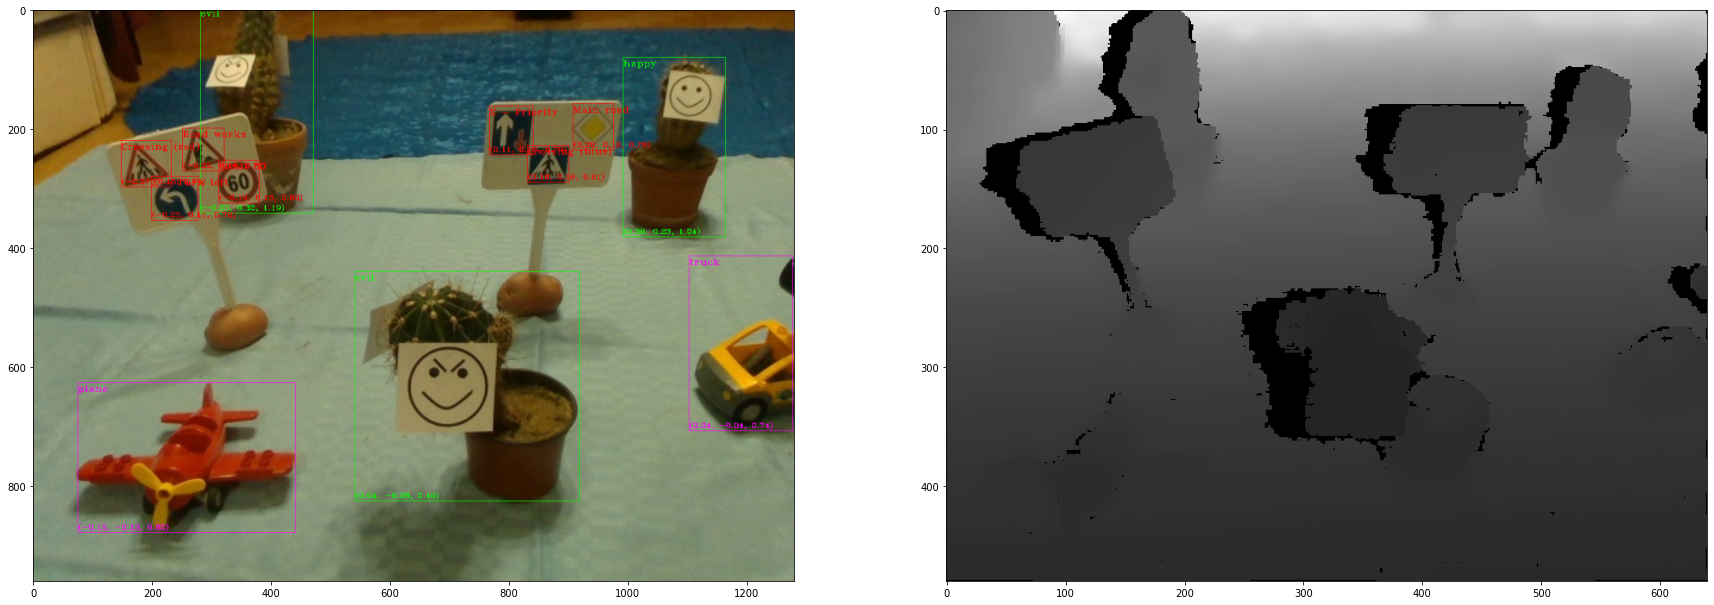

In [0]:

colors = [(0,0,255),(255,0,255),(0,255,0)]

def drawBBs(BBs, img):
    img = cv2.resize(img, (1280, 960))
    for BB in BBs:
        u = BB[0]*2
        v = BB[1]*2
        w = BB[2]*2
        h = BB[3]*2
        c = BB[4]
        sc = BB[5]
        x = BB[6]
        y = BB[7]
        z = BB[8]
        s = (u - w // 2, v - h // 2)
        e = (u + w // 2, v + h // 2)
        cv2.rectangle(img, s, e, colors[c], 1)
        tl = (s[0], s[1]+15)
        bl = (s[0], e[1]-5)
        cv2.putText(img,subclassNames[c][sc],tl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.75,colors[c])
        coords = "(%.2f, %.2f, %.2f)" % (x,y,z)
        cv2.putText(img,coords,bl,cv2.FONT_HERSHEY_COMPLEX_SMALL,0.65,colors[c])
    
    return img

import pickle
import cv2
import matplotlib.pyplot as plt
#This way it doesn't try to open a window un the GUI - works in python notebook
%matplotlib inline

# Read images
img = cv2.imread("HW/g1/rgb/1.jpg")
depth = cv2.imread("HW/g1/depth/1.png", -1)

# Read annotations
file = open('HW/annotations.pickle','rb')
annotations = pickle.load(file)

# Visualization
depth = depth / 5000.0
img = drawBBs(annotations["HW/g1/rgb/1.jpg"]["objects"], img)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Figure with subplots
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(depth,cmap='gray')

# Your Work

In [0]:
!pip install torch torchvision

Creating CNN model

In [0]:
import torch
import torch.nn as nn

# Convolutional module (Conv+ReLU+BatchNorm)
class Conv(nn.Module):
    
    # Constructor gets in and output channels and stride
    def __init__(self, in_channels, channels, stride=1):
        super(Conv, self).__init__()
        
        # Create 2D Convolution (3x3)
        self.conv = nn.Conv2d(in_channels, channels, kernel_size=3, stride=stride, padding=1, bias=False)
        
        # Create Batchnorm
        self.bn = nn.BatchNorm2d(channels)
        
    # Overwrite forward
    def forward(self,x):
        # Call the layers in the proper order
        return self.bn(torch.relu(self.conv(x)))

class ConvNet(nn.Module):
    
    # Constructor gets channel number of the image and the first filter
    def __init__(self, base_channels=16, in_channels=3, num_classes=52):
        super(ConvNet, self).__init__()
        
        # First two filters
        self.c11 = Conv(in_channels, base_channels)
        self.c12 = Conv(base_channels, base_channels)
        
        # Downscale using strided convolution and expand channels
        self.d1 = Conv(base_channels, base_channels*2, 2)
        
        # Repeat this 4 times
        self.c21 = Conv(base_channels*2, base_channels*2)
        self.c22 = Conv(base_channels*2, base_channels*2)
        
        self.d2 = Conv(base_channels*2, base_channels*4, 2)
        
        self.c31 = Conv(base_channels*4, base_channels*4)
        self.c32 = Conv(base_channels*4, base_channels*4)
        
        self.d3 = Conv(base_channels*4, base_channels*8, 2)
        
        self.c41 = Conv(base_channels*8, base_channels*8)
        self.c42 = Conv(base_channels*8, base_channels*8)
        
        self.d4 = Conv(base_channels*8, base_channels*16, 2)
        
        self.c51 = Conv(base_channels*16, base_channels*16)
        self.c52 = Conv(base_channels*16, base_channels*16)
        
        # Input image is 32x32 -> after 5 downscaling the activation map is 1x1
        self.d5 = Conv(base_channels*16, base_channels*32, 2)
        
        # Classifier is a normal 1x1 convolution that produces num_classes class scores
        # This layer does not have BatchNorm of ReLU
        self.classifier = nn.Conv2d(base_channels*32,num_classes,kernel_size=1)
        
    def forward(self,x):
        # Class all the layers
        x = self.d1(self.c12(self.c11(x)))
        x = self.d2(self.c22(self.c21(x)))
        x = self.d3(self.c32(self.c31(x)))
        x = self.d4(self.c42(self.c41(x)))
        x = self.d5(self.c52(self.c51(x)))
        
        # Squeeze removes dimensions that have only 1 element
        # Output of the conv layer is (batch_size x num_classes x 1 x 1)
        # After squeeze is becomes (batch_size x num_classes)
        return torch.squeeze(self.classifier(x))
print("finished")

finished


cuda check

In [0]:
haveCuda = torch.cuda.is_available()
print(haveCuda)

True


### Data Augmentation

In [0]:
from torchvision import transforms

# Necessary transformations: conversion to PyTorch Tensor and normalization
# Normalization is performed with channels-wise means and variances computed on ImageNet
transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124),
                         (0.24703233, 0.24348505, 0.26158768))
])

# Train database transform includes data augmentation
transform = transforms.Compose([
    # Random 32x32 crops (with 4-wide zero padding - this is needed because the 
    # input is 32x32 so we can't crop a 32x32 region out of it without padding)
    transforms.RandomCrop(32,padding=4),
    # Flips horizontally with p=0.5
    
    #transforms.RandomHorizontalFlip(),
    
    # Random perturbance of brightness, contrast and color
    transforms.ColorJitter(brightness=0.3,contrast=0.3,saturation=0.3,hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124),
                         (0.24703233, 0.24348505, 0.26158768))
])
print("finished")

finished


In [0]:
import os
import shutil

def get_folders(path):
  myFolderList = os.listdir(path)
  myFolderList.sort()
  return myFolderList

def create_dataset_labels(path):
  folders = get_folders(path)
  labels = []
  all_img = 0

  for i in (folders):
    #print(i)
    label_count = len(os.listdir(path + '/' + i))
    for j in range(label_count):
      labels.append(i)
      all_img += 1
  
  return labels

train_labels = create_dataset_labels('./trafficSignsHW/trainFULL')
test_labels = create_dataset_labels('./trafficSignsHW/testFULL')
print(len(train_labels), len(test_labels))
#print(create_dataset_labels('./trafficSignsHW/testFULL'))

def rename_images(path):
    folders = get_folders(path)
    for i in (folders):
      file_names = get_folders(path + '/' + i)
      for j in file_names:
        os.rename(path + '/' + i + '/' + j, path + '/' + i + '/'+ i +'_'+ j)

shutil.copytree('./trafficSignsHW', './renamed')
rename_images('./renamed/trainFULL')
rename_images('./renamed/testFULL')
#create copy of dataset

#function to copy all images to dst
def copy_images(mode, source, dst):
  folders = get_folders(source)
  copy_destination = dst + '/' + mode
  if not os.path.exists(copy_destination):
    os.makedirs(copy_destination)
  for i in (folders):

    file_names = get_folders(source + '/' + i)
    for j in file_names:
      file_to_copy = source + '/' + i + '/' + j
      shutil.copy(file_to_copy, copy_destination + '/')

copy_images('Train', './renamed/trainFULL', '.')
copy_images('Test', './renamed/testFULL', '.')


def delete_folder(path):
  try:
    shutil.rmtree(path)
  except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))
#delete_folder('./Train')



104027 10418


In [0]:
train_img_names = os.listdir('./Train')
test_img_names = os.listdir('./Test')
print(len(train_img_names), len(test_img_names))
train_img_names.sort()
test_img_names.sort()


104027 10418


In [0]:
!pip install pip opencv-python
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [0]:
import cv2
import numpy as np
from sklearn import preprocessing

train_imgs = []
test_imgs = []

#transpose needed to have the expected dimensions 
for i in (train_img_names):
  img = cv2.imread('./Train/' + i)
  img = img.transpose(2,0,1)
  train_imgs.append(img)

for i in (test_img_names):
  img = cv2.imread('./Test/' + i)
  img = img.transpose(2,0,1)
  test_imgs.append(img)
print(len(os.listdir('./renamed/trainFULL')))

le_train = preprocessing.LabelEncoder()
target_train = le_train.fit_transform(train_labels)
target_train = np.array(target_train)
train_imgs = np.array(train_imgs)
train_data_tensor = torch.from_numpy(train_imgs)
train_labels_tensor = torch.from_numpy(target_train)
train_labels_tensor = train_labels_tensor.long()
train_data_tensor = train_data_tensor.float()
trainSet = torch.utils.data.TensorDataset(train_data_tensor, train_labels_tensor)
print(train_labels_tensor.shape)
print(train_data_tensor.shape)
#Dimensions should be [size, number of channels, height, width]

le_test = preprocessing.LabelEncoder()
target_test = le_test.fit_transform(test_labels)
target_test = np.array(target_test)
test_imgs = np.array(test_imgs)
test_data_tensor = torch.from_numpy(test_imgs)
test_labels_tensor = torch.from_numpy(target_test)
test_data_tensor = test_data_tensor.float()
test_labels_tensor = test_labels_tensor.long()

testSet = torch.utils.data.TensorDataset(test_data_tensor, test_labels_tensor)




52
torch.Size([104027])
torch.Size([104027, 3, 32, 32])


In [0]:
import torchvision


train_data = torchvision.datasets.ImageFolder('./trafficSignsHW/trainFULL',transform=transform)
test_data = torchvision.datasets.ImageFolder('./trafficSignsHW/testFULL',transform=transform_val)

trainLoader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
testLoader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

def createNet():
    net = ConvNet()
    if haveCuda:
        net = net.cuda()
    return net

def createLoss():
    return nn.CrossEntropyLoss()

from torch import optim

# Stochastic Gradient Descent (SGD) optimizer with Nesterov momentum and 0.1 learning rate
# Weight decay is the relative weight of the L2 regularization term
def createOptimizer():
    return optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, nesterov=True, weight_decay=1e-4)

# Run for 50 epochs - 1 epoch means the networks sees every training image once
numEpoch = 10

# Cosine annealing learning rate scheduler - in 50 epochs the lr will become 0.01
def createScheduler():
    return optim.lr_scheduler.CosineAnnealingLR(optimizer,numEpoch,eta_min=1e-2)

from IPython.display import HTML, display

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))


#TRAIN
def train(epoch):

    # variables for loss
    running_loss = 0.0
    correct = 0.0
    total = 0

    # set the network to train (for batchnorm and dropout)
    net.train()

    # Create progress bar
    bar = display(progress(0, len(trainLoader)), display_id=True)
  
    # data will contain one minibatch of images and correcponding labels
    # When the iteration is finished we have seen every training image once
    for i, data in enumerate(trainLoader, 0):
        # get the inputs
        #print(i)
        inputs, labels = data

        #Convert to cuda
        if haveCuda:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Clear any previous gradients
        optimizer.zero_grad()

        # Forward
        outputs = net(inputs)
        # Loss
        loss = criterion(outputs, labels)
        # Backpropagation
        loss.backward()
        # Gradient method
        optimizer.step()

        # Do not include these steps in the computational graph
        with torch.no_grad():
            # Accumulate loss
            running_loss += loss.item()
            # Get indices of the largest goodness values
            _, predicted = torch.max(outputs, 1)
            # Count how many of the predictions equal the labels
            correct += predicted.eq(labels).sum().item()
            # Accumulate number of total images seen
            total += labels.size(0)

        # Progress bar
        bar.update(progress(i+1, len(trainLoader)))

    # return loss and accuracy
    tr_loss = running_loss / i
    tr_corr = correct / total * 100
    print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, running_loss / i, tr_corr))
    return tr_loss,tr_corr

#TEST
def val(epoch):

    # variables for loss
    running_loss = 0.0
    correct = 0.0
    total = 0

    # set the network to eval  (for batchnorm and dropout)
    net.eval()

    # Create progress bar
    bar = display(progress(0, len(testLoader)), display_id=True)

    for i, data in enumerate(testLoader, 0):
        # get the inputs
        inputs, labels = data

        # Convert to cuda
        if haveCuda:
            inputs, labels = inputs.cuda(), labels.cuda()

        # Do not include these steps in the computational graph
        with torch.no_grad():
            # Forward
            outputs = net(inputs)
            # Compute loss
            loss = criterion(outputs, labels)

            # Compute statistics, just like before
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        bar.update(progress(i+1, len(testLoader)))

    # return loss and accuracy
    val_loss = running_loss / i
    val_corr = correct / total * 100
    print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, running_loss / i, val_corr))
    return val_loss,val_corr






In [0]:
# Containers for losses and accuracies for every epoch
train_accs = []
train_losses = []
val_accs = []
val_losses = []

# Best validation accuracy
best_acc = 0

# Set pseudo-random generator seeds to make multiple runs comparable
torch.manual_seed(42)
if haveCuda:
    torch.cuda.manual_seed(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Create net, criterion, optimizer and scheduler
# This needs to be done after setting the random seed, 
# so that the random initialization would be the same
net = createNet()
criterion = createLoss()
optimizer = createOptimizer()
scheduler = createScheduler()

# For numEpoch epochs
for epoch in range(numEpoch):
#for epoch in range(10):
    
    # The with the LR scheduler
    scheduler.step()
    
    # Train
    loss,acc = train(epoch)
    train_accs.append(acc)
    train_losses.append(loss)
    
    # Validate
    loss,acc = val(epoch)
    val_accs.append(acc)
    val_losses.append(loss)
    
    # If the current model is better, than the previous best, save it
    if acc > best_acc:
        print("Best Model, Saving")
        best_acc = acc
        torch.save(net,"./model.pth")
        


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:122: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train epoch 1 loss: 2.347 correct: 35.28


Test epoch 1 loss: 0.523 correct: 88.11
Best Model, Saving


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Conv. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Train epoch 2 loss: 0.316 correct: 90.34


Test epoch 2 loss: 0.235 correct: 93.97
Best Model, Saving


Train epoch 3 loss: 0.165 correct: 95.09


Test epoch 3 loss: 0.129 correct: 96.73
Best Model, Saving


Train epoch 4 loss: 0.123 correct: 96.46


Test epoch 4 loss: 0.098 correct: 97.35
Best Model, Saving


Train epoch 5 loss: 0.104 correct: 96.97


Test epoch 5 loss: 0.084 correct: 97.90
Best Model, Saving


Train epoch 6 loss: 0.069 correct: 98.05


Test epoch 6 loss: 0.414 correct: 97.27


Train epoch 7 loss: 0.053 correct: 98.48


Test epoch 7 loss: 0.039 correct: 98.94
Best Model, Saving


Train epoch 8 loss: 0.033 correct: 99.05


Test epoch 8 loss: 0.029 correct: 99.28
Best Model, Saving


Train epoch 9 loss: 0.025 correct: 99.27


Test epoch 9 loss: 0.035 correct: 99.01


Train epoch 10 loss: 0.021 correct: 99.41


Test epoch 10 loss: 0.033 correct: 99.17


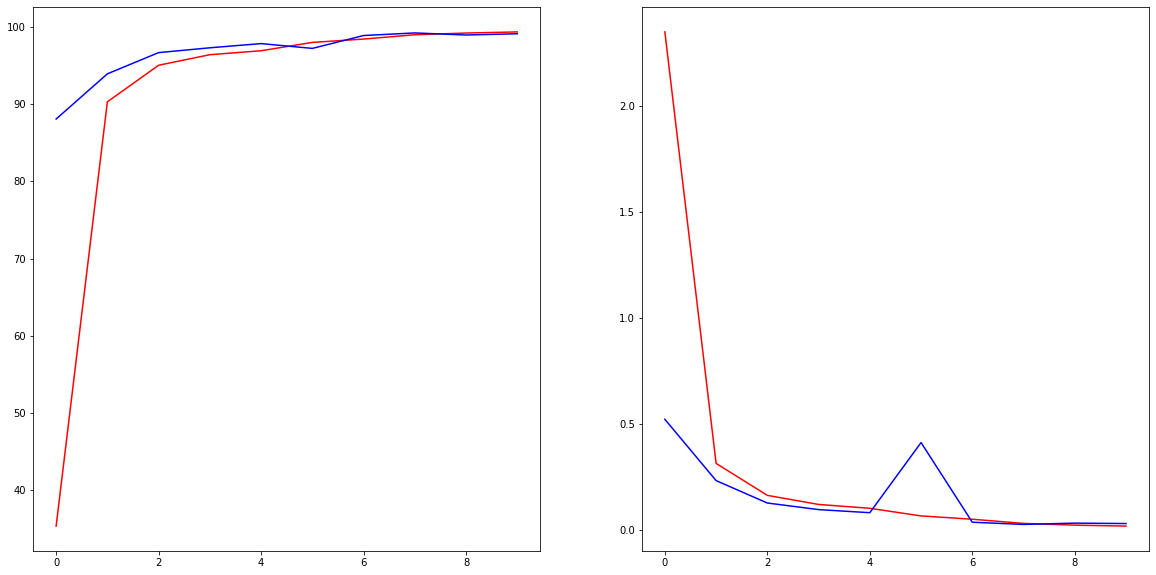

In [0]:
#PLOT
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# X coordinate for plotting
x = np.arange(numEpoch)

plt.figure(figsize=(20,10))

# Train is red, validation is blue
plt.subplot(1,2,1)
plt.plot(x,train_accs,'r')
plt.plot(x,val_accs,'b')

plt.subplot(1,2,2)
plt.plot(x,train_losses,'r')
plt.plot(x,val_losses,'b')

plt.show()



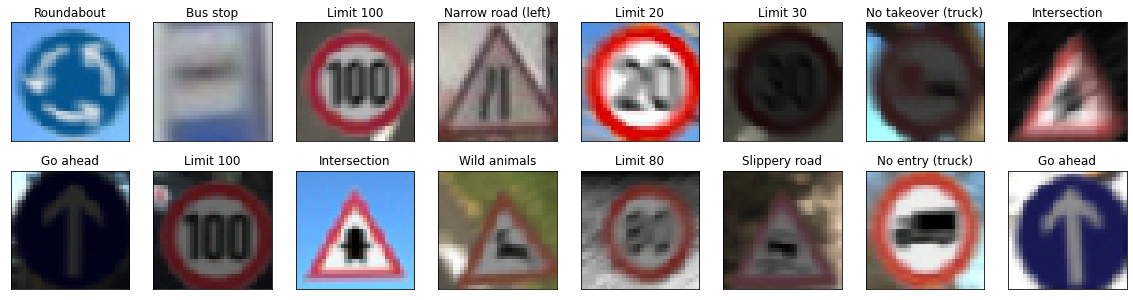

In [0]:
# Get a minibatch from the test loader and convert to cuda
inputs, labels = next(iter(testLoader))
if haveCuda:
    inputs, labels = inputs.cuda(), labels.cuda()

# forward
outputs = net(inputs)

# Get predicted class indices
_, predicted = torch.max(outputs, 1)

# Values used for normalization
mean = torch.Tensor((0.49139968, 0.48215827, 0.44653124)).unsqueeze(1).unsqueeze(1)
std = torch.Tensor((0.24703233, 0.24348505, 0.26158768)).unsqueeze(1).unsqueeze(1)

# Class names

classes = ['Bump', 'Bumpy road', 'Bus stop', 'Children', 'Crossing (blue)', 'Crossing (red)', 'Cyclists',
     'Danger (other)', 'Dangerous left turn', 'Dangerous right turn', 'Give way', 'Go ahead', 'Go ahead or left',
     'Go ahead or right', 'Go around either way', 'Go around left', 'Go around right', 'Intersection', 'Limit 100',
     'Limit 120', 'Limit 20', 'Limit 30', 'Limit 50', 'Limit 60', 'Limit 70', 'Limit 80', 'Limit 80 over',
     'Limit over', 'Main road', 'Main road over', 'Multiple dangerous turns', 'Narrow road (left)',
     'Narrow road (right)', 'No entry', 'No entry (both directions)', 'No entry (truck)', 'No stopping', 'No takeover',
     'No takeover (truck)', 'No takeover (truck) end', 'No takeover end', 'No waiting', 'One way road',
     'Parking', 'Road works', 'Roundabout', 'Slippery road', 'Stop', 'Traffic light', 'Train crossing',
     'Train crossing (no barrier)', 'Wild animals']

# List of subplots - we'll use 16 images
f, axarr = plt.subplots(2, 8,figsize=(20, 5))

# For every image-prediction pair
for i,(img,pred) in enumerate(zip(inputs,predicted)):
    # undo the normalization
    img_rescaled = img.cpu() * std + mean
    
    # Get predicted class name
    name = classes[pred.cpu().item()]
    
    # Permutation needed because in PyTorch the channel dimension comes first,
    # but in numpy and opencv it comes last (3x32x32) -> (32x32x3)
    axarr[i//8,i%8].imshow(img_rescaled.permute(1,2,0))
    
    # Set title to class name
    axarr[i//8,i%8].set_title(name)
    
    # Hide grid lines
    axarr[i//8,i%8].grid(False)
    
    # Hide axes ticks
    axarr[i//8,i%8].set_xticks([])
    axarr[i//8,i%8].set_yticks([])
    
    # Only do the first 16
    if i == 15:
        break

In [0]:
model = torch.load('./model.pth')
model.eval()

img = cv2.imread('./renamed/testFULL/Bump/Bump_img(8200).jpg')
img2 = cv2.imread('./renamed/testFULL/Bump/Bump_img(8201).jpg')

imgs = []
img = img.transpose(2,0,1)
img2 = img2.transpose(2,0,1)
imgs.append(img)
imgs.append(img2)
img_arr = np.array(imgs)
#img_arr = np.append(img, img2, axis=0)

img_arr = torch.from_numpy(img_arr)
img_arr = img_arr.float()
img_arr = img_arr.cuda()

output = model.forward(img_arr)
output = torch.exp(output)
probs, classes = output.topk(1, dim=1)
print(classes[0].item())
print(probs[0].item())


0
inf


# Evaluation

This snippet assumes that the contents of the downloaded zip file are in the HW folder, and that your predictions are in a dictionary called predictions that adheres to the format specified above

In [0]:
from HW.evaluate import evaluate

#file = open('HW/annotations.pickle','rb')
#predictions = pickle.load(file)

evaluate(predictions)

NameError: ignored

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
